In [1]:
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
D = 25.5;
n = 16
nLenslet =30
nPx = n*nLenslet + 1 ;
src    = ceo.Source("R",zenith=0*math.pi/180/3600,azimuth=0*math.pi/4,
                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,-25])
osrc    = ceo.Source("R",zenith=60*5*math.pi/180/3600,azimuth=0*math.pi/4,
                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,-25])
imgr = ceo.ShackHartmann(1, nPx-1, D ,DFT_osf=2,N_PX_IMAGE=nPx)
wfs = ceo.ShackHartmann(nLenslet, n, D/nLenslet,N_PX_IMAGE=2*n)
gmt = ceo.GMT_MX(D,nPx)

In [3]:
src.reset()
gmt.propagate(src)
imgr.calibrate(src,0.0)
wfs.calibrate(src,0.75)

<matplotlib.colorbar.Colorbar instance at 0x2b924da33b90>

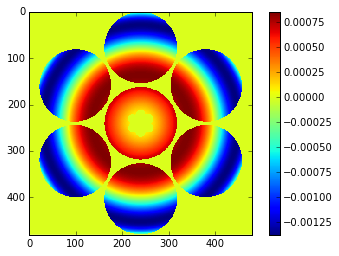

In [4]:
src.reset()
gmt.reset()
gmt.propagate(src)
opl0 = src.rays.optical_path_length.host()*1e6
opd0 = src.rays.optical_path_difference.host()*1e6
figure
imshow(np.reshape(opd0,(nPx,nPx)),interpolation='none')
colorbar()

In [5]:
print src.wavefront.rms()

[  7.91277155e-10]


0.621221063194


<matplotlib.colorbar.Colorbar instance at 0x2b924e61c4d0>

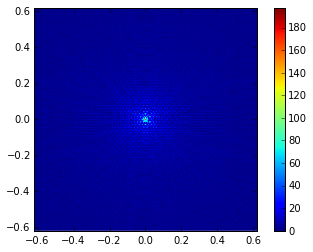

In [6]:
imgr.analyze(src)
lim = (nPx-1)/2*imgr.pixel_scale_arcsec
print lim
imshow(imgr.frame.host()**0.25,interpolation='none',extent=[-lim,lim,-lim,lim],origin='lower')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x2b924deaf560>

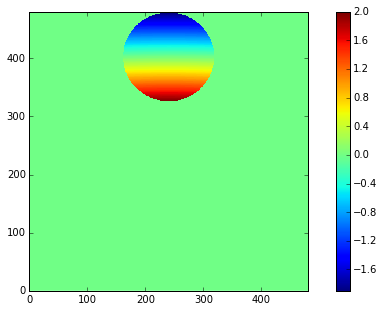

In [7]:
src.reset()
gmt.reset()
x_tt = 50e-3
y_tt = 0.0
c = math.pi/180/3600.0
gmt.M1.update(origin=[0,0,0],euler_angles=[x_tt*c,y_tt*c,0],idx=1)
gmt.propagate(src)
opl_loc = src.rays.optical_path_length.host()*1e6
opd_loc = src.rays.optical_path_difference.host()*1e6
fig, ax2 = subplots(ncols=1)
fig.set_size_inches(10,5)
h2 = ax2.imshow(np.reshape(opd_loc,(nPx,nPx)),interpolation='none',origin='lower')
colorbar(h2)

<matplotlib.colorbar.Colorbar instance at 0x2b924f6fc878>

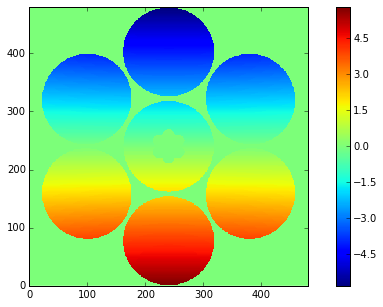

In [18]:
src.reset()
gmt.reset()
gmt.M1.global_tiptilt(x_tt*c,y_tt*c)
gmt.propagate(src)
opl_glb = src.rays.optical_path_length.host()*1e6
opd_glb = src.phase.host(units='micron')#src.rays.optical_path_difference.host()*1e6
fig, ax2 = subplots(ncols=1)
fig.set_size_inches(10,5)
h2 = ax2.imshow(opd_glb,interpolation='none',origin='lower')
colorbar(h2)

<matplotlib.colorbar.Colorbar instance at 0x2b924fc64fc8>

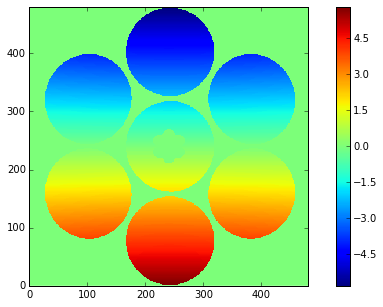

In [22]:
osrc.reset()
gmt.reset()
gmt.propagate(osrc)
oopd_glb0 = osrc.phase.host(units='micron')#src.rays.optical_path_difference.host()*1e6
osrc.reset()
gmt.M1.global_tiptilt(x_tt*c,y_tt*c)
gmt.propagate(osrc)
oopl_glb = osrc.rays.optical_path_length.host()*1e6
oopd_glb = osrc.phase.host(units='micron')#src.rays.optical_path_difference.host()*1e6
fig, ax2 = subplots(ncols=1)
fig.set_size_inches(10,5)
h2 = ax2.imshow(oopd_glb-oopd_glb0,interpolation='none',origin='lower')
colorbar(h2)

In [17]:
gmt.M1.motion_CS.origin

array([[  0.00000000e+00,   2.45334062e-07,   2.11255950e-06],
       [  2.21202469e-07,   1.22666973e-07,   1.05627978e-06],
       [  2.21202691e-07,  -1.22666834e-07,  -1.05627975e-06],
       [  3.12802953e-23,  -2.45333550e-07,  -2.11255956e-06],
       [ -2.21202691e-07,  -1.22666834e-07,  -1.05627975e-06],
       [ -2.21202469e-07,   1.22666973e-07,   1.05627978e-06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

IMGR pixel scale  2.59 mas
IMGR pixel scale 1245.03 mas
0.310610531597


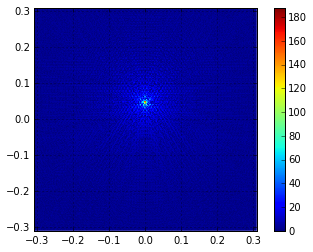

In [18]:
imgr.reset()
imgr.analyze(src)
print 'IMGR pixel scale %5.2f mas'%(imgr.pixel_scale_arcsec*1e3)
print 'IMGR pixel scale %5.2f mas'%(imgr.pixel_scale_arcsec*1e3*nPx)
lim = (nPx-1)/2*imgr.pixel_scale_arcsec/2
print lim
imshow(imgr.frame.host()**0.25,interpolation='none',extent=[-lim,lim,-lim,lim],origin='lower')
colorbar()
grid()

In [30]:
print imgr.c.host(units='arcsec')*1e3

[[ -4.34457877e-04  -5.68682098e+01]]


WFS pixel scale 77.65 mas
WFS pixel scale 2484.88 mas


<matplotlib.colorbar.Colorbar instance at 0x2b31675f39e0>

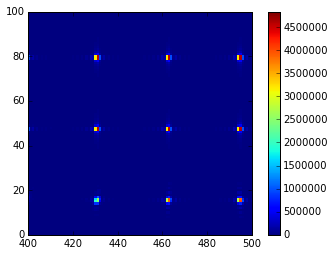

In [31]:
wfs.reset()
wfs.analyze(src)
print 'WFS pixel scale %5.2f mas'%(wfs.pixel_scale_arcsec*1e3)
print 'WFS pixel scale %5.2f mas'%(wfs.pixel_scale_arcsec*1e3*n*2)
imshow(wfs.frame.host(),interpolation='none',origin='lower')
axis([400,500,0,100])
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x2b316776a050>

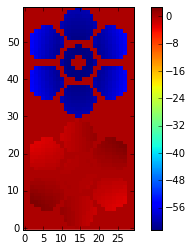

In [32]:
imshow(1e3*wfs.c.host(units='arcsec').reshape(2*nLenslet
                                    ,nLenslet),interpolation='none',origin='lower')
colorbar()